# Predicting Customer Churn in SyriaTel

# 1.Business Understanding


Churn is a critical metric for any subscription-based service like a telecommunications company. When customers leave the 
service, it not only impacts revenue but also reflects customer dissatisfaction.The primary objective is to predict which
customers are likely to churn, i.e., discontinue their subscription with SyriaTel.


The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel
aims to gain insights into factors associated with churn, with the goal of reducing churn rate, increasing customer 
retention, and improving overall profitability.

# Objectives 

1.To predict customer churn using a classification algorithm model


2.To do exploratory data analysis on the data


3.To fit different classification algorithm models to determine which one works best for churn prediction


4.To select the best model


5.To make predictions using the selected model


6.To check the accuracy of the predicted variables

# Your Task : Predict customer churn using a classification algorithm model

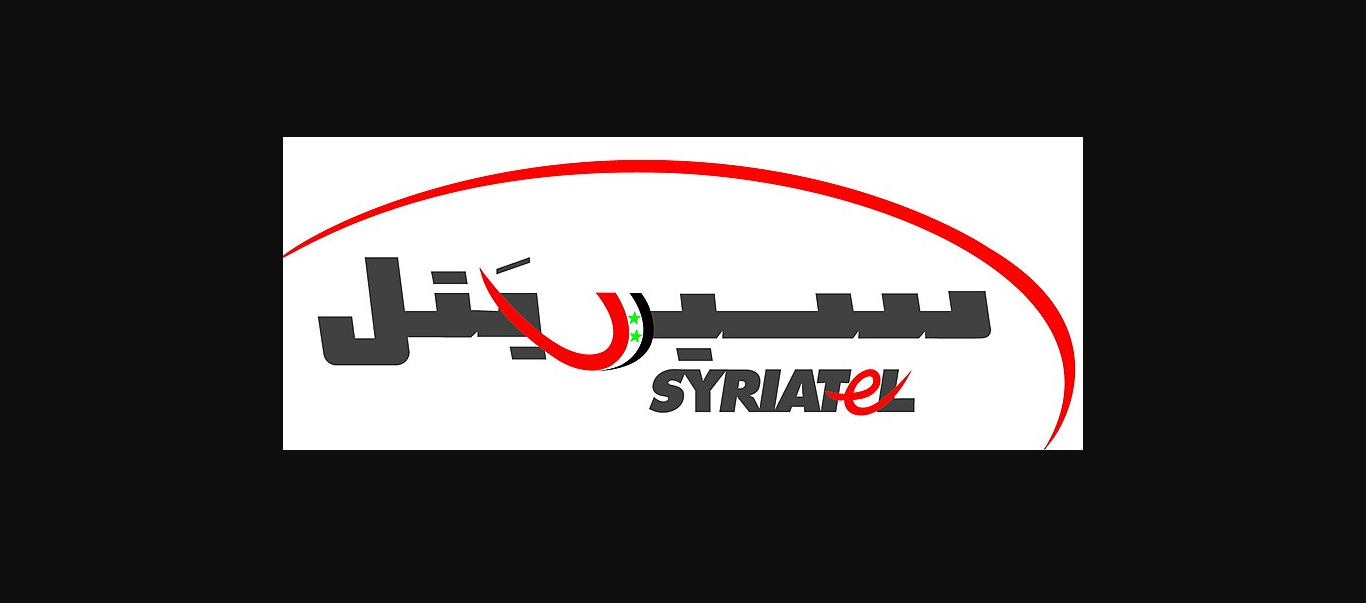

### 2.Data Understanding

This dataset was obtained from kaggle , "https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset" . It contains
3333 entries and 21 columns . We will focus on getting familiar with the data and identifying any potential data quality 
issues. We will also perform some initial exploratory data analysis to discover first insights into the data.

The dataset provided information on the following features for each customer:

State ,
Length of account ,
Area code ,
Phone numbers ,
If the customer has an international plan ,
If the customer has a voicemail plan ,
No. of voicemail messages ,
Breakdown of call minutes for day, evening, night, and international ,
Breakdown of call charges for day, evening, night, and international ,
Breakdown of no. of calls for day, evening, night, and international ,
No. of calls to customer service ,
If they have churned .

### 3.Data Preparation

In this section, we are going to do several actions to prepare our data for exploratory data analysis and modelling. First,
we will import all the necessary libraries, load the dataset using pandas library, preview the data (how many features a
records, as well as statistical features), and conduct thorough data preprocessing (checking and removing any missing 
values and transforming data).

In [99]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE




In [100]:
#Load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [101]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [102]:
# Numerical Columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [103]:
# Summary statistics for numerical columns
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [104]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [105]:
#converting 'area code' datatype
df["area code"] = df["area code"].astype(object)

In [106]:
# Drop irrelevant columns like 'phone number' which is not useful for prediction
df = df.drop('phone number', axis=1)



# Doing EDA Analysis

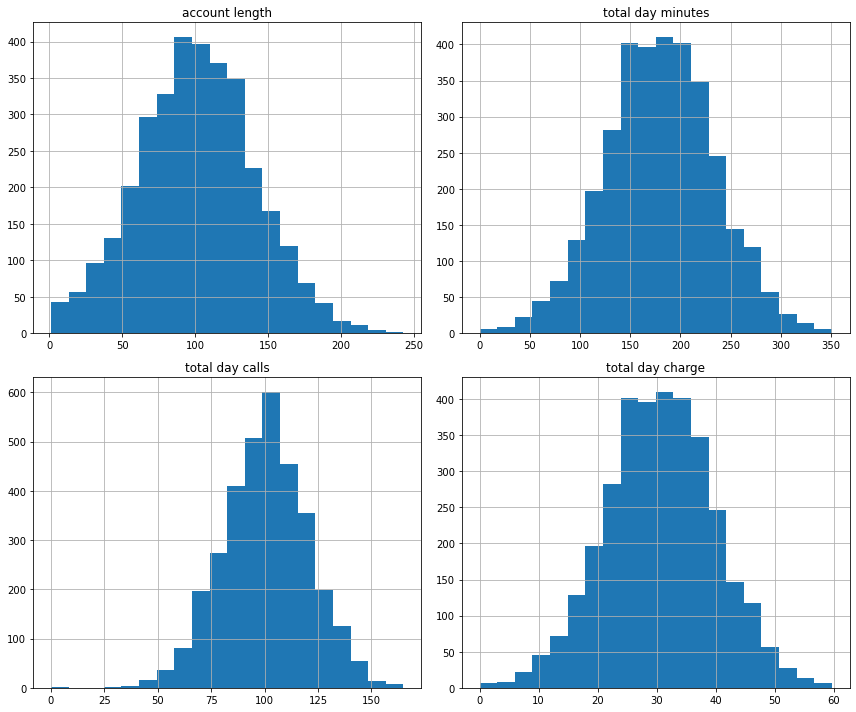

In [109]:
# Select numeric features to visualize
numeric_features = ['account length', 'total day minutes', 'total day calls', 'total day charge']

# Plot histograms for numeric features
df[numeric_features].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

For the distribution plots of the features above they seem to have a normal distribution.

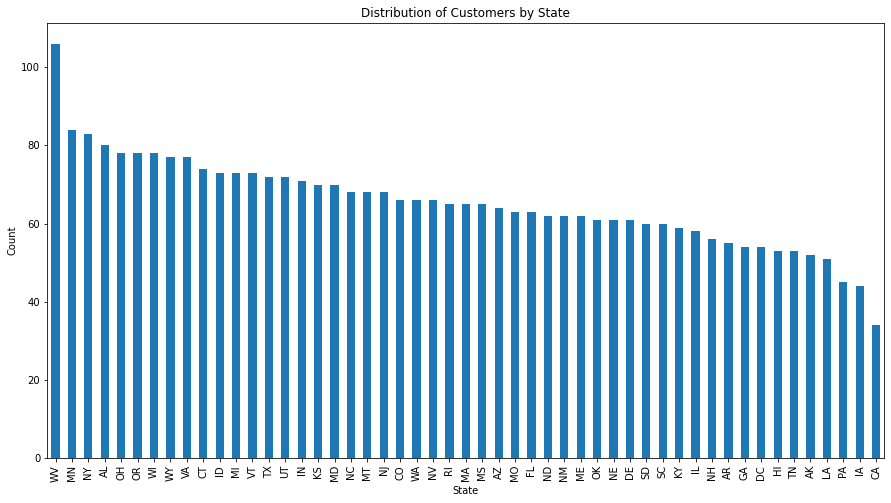

In [110]:
# Count the number of customers in each state
state_counts = df['state'].value_counts()

# Plot the distribution
plt.figure(figsize=(15, 8))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Customers by State')
plt.show()

Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin.

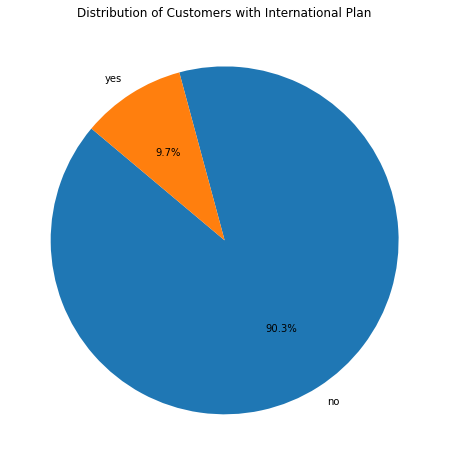

In [111]:

# Count the number of customers with and without an international plan
international_plan_counts = df['international plan'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 8))
plt.pie(international_plan_counts, labels=international_plan_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers with International Plan')
plt.show()

From the 3333 customers ,323 customers have international plan (that makes 9.7% of the customers) and 3010 customers do not
have an international plan (that makes 90.3% of the customers)

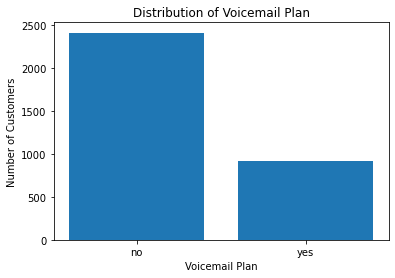

In [112]:
# Count the number of customers with and without a voicemail plan
voicemail_plan_counts = df['voice mail plan'].value_counts()

# Plot a histogram
plt.bar(voicemail_plan_counts.index, voicemail_plan_counts.values)
plt.xlabel('Voicemail Plan')
plt.ylabel('Number of Customers')
plt.title('Distribution of Voicemail Plan')
plt.show()

In [113]:
# Print the counts
print("Number of customers with voicemail plan:", voicemail_plan_counts['yes'])
print("Number of customers without voicemail plan:", voicemail_plan_counts['no'])

Number of customers with voicemail plan: 922
Number of customers without voicemail plan: 2411


From the 3333 customers ,922 customers have a voice mail plan and 2411 customers do not have a voicemail plan.

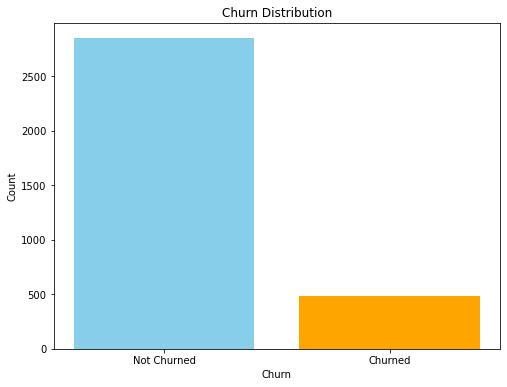

In [158]:
# Churn distribution
churn_counts = df['churn'].value_counts()

# Plotting a bar graph
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [159]:
churn_counts = df['churn'].value_counts()
print("Number of not churned (0):", churn_counts[0])
print("Number of churned (1):", churn_counts[1])

Number of not churned (0): 2850
Number of churned (1): 483


Out of  the 3,333 customers in the dataset, 483 have terminated their contract. That is 14.5% of customers lost. The
distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced 
feature can cause the model to make false predictions.

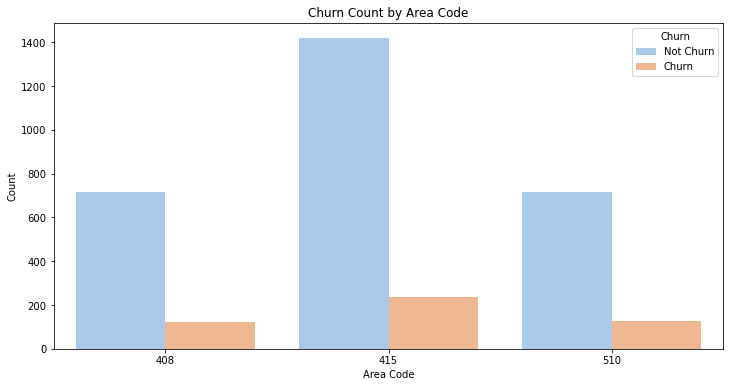

In [117]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='area code', hue='churn', data=df, palette='pastel')

plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Churn Count by Area Code')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

In [118]:
churn_counts_by_area = df.groupby(['area code', 'churn']).size().unstack()

# Display the count of churned and not churned customers for each area code
print("Churn Counts by Area Code:")

print(churn_counts_by_area)

Churn Counts by Area Code:
churn      False  True 
area code              
408          716    122
415         1419    236
510          715    125


Of the customers who have terminated their account, most of them are from area codes 415 and 510.

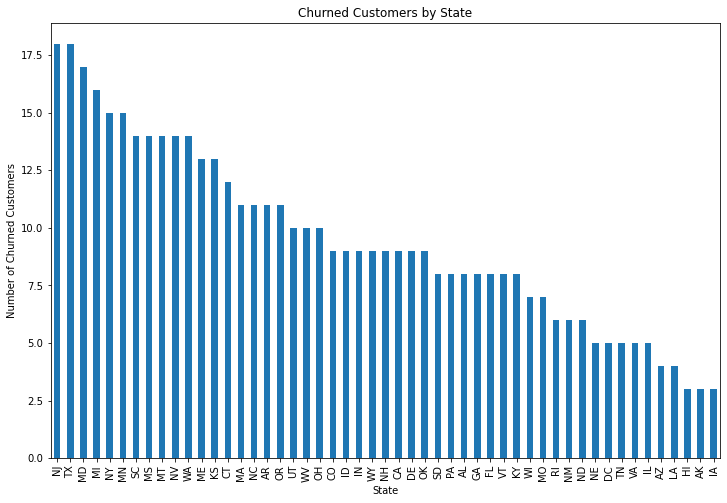

In [119]:
# Filter the DataFrame to get only churned customers
churned_customers = df[df['churn']]

# Group by state and count the number of churned customers in each state
state_churn_counts = churned_customers['state'].value_counts()

# Plot the data
state_churn_counts.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Churned Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Churned Customers')

# Show the plot
plt.show()

Of all the customers that churned, majority are from Texas, New Jersey, Maryland,Miami and NewYork.

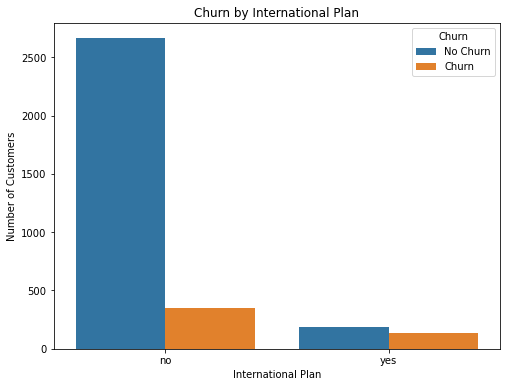

In [120]:
# Create a count plot for Churn based on International Plan
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df)

# Customize the plot
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Show the plot
plt.show()

The majority of customers who churned did not have an international plan.

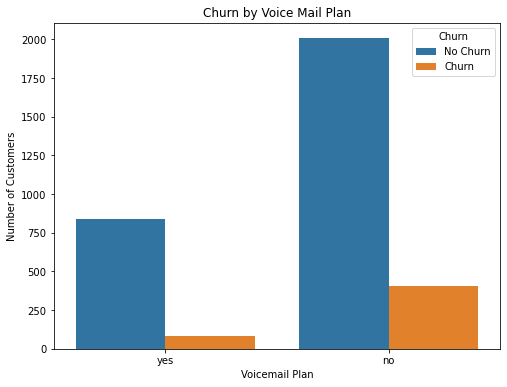

In [121]:
# Create a count plot for Churn based on International Plan
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df)

# Customize the plot
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voicemail Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Show the plot
plt.show()

The majority of customers who churned did not have an voicemail plan.

# Data Preprocessing

In [123]:
# Perform label encoding for binary categorical features
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])


In [124]:
# Perform one-hot encoding for 'area code'
df = pd.get_dummies(df, columns=['area code','state','international plan', 'voice mail plan'], drop_first=True)


In [125]:
# Separate features and target variable
X = df.drop('churn', axis=1)
y = df['churn']


In [126]:
# Scale the data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [127]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [128]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# 4.Modelling

In this section, we will build a model that can predict the customer churn based on the features in our dataset. The model 
will be evaluated on the recall score.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:
    
Logistic Regression

Decision Tree

Random Forest

XG Boost

We will also be using the ROC_AUCmetric to evaluate the performance of our models

# 4.1 Logistic Regression 

In [130]:
# Train a logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [131]:
# Predictions
y_pred = log_reg_model.predict(X_test)

In [132]:
# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7856071964017991


In [133]:
# Display the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.95      0.79      0.86       566
        True       0.39      0.74      0.51       101

    accuracy                           0.79       667
   macro avg       0.67      0.77      0.69       667
weighted avg       0.86      0.79      0.81       667



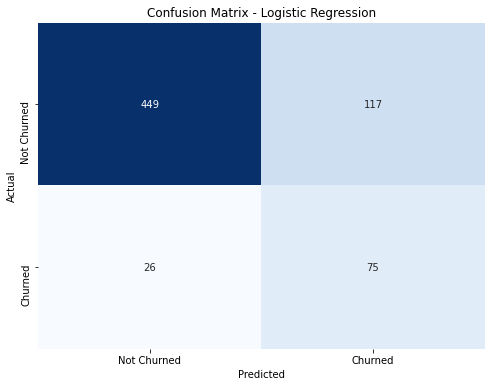

In [134]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Top 10 Features and Their Importances:
                   Feature  Importance
14  customer service calls    6.050730
67    international plan_1    2.578245
4         total day charge    2.384420
2        total day minutes    2.382705
5        total eve minutes    1.090201
7         total eve charge    1.084501
42                state_MT    1.065360
56                state_SC    1.048968
1    number vmail messages    0.878668
13       total intl charge    0.779683


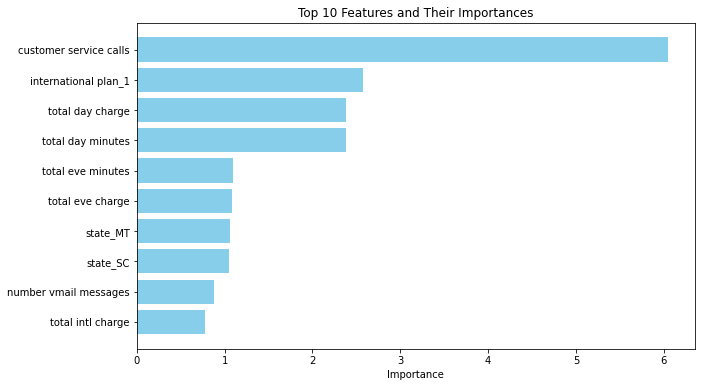

In [135]:
# Extract feature importances from the logistic regression model
feature_importances = log_reg_model.coef_[0]

# Create a DataFrame to display feature names and their respective importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features and their importances
top_10_features = feature_importance_df.head(10)
print("Top 10 Features and Their Importances:")
print(top_10_features)

# Plot the top 10 features and their importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features and Their Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

The logistic regression model has a recall score of 0.74, which is actually good for a baseline model. This means that the
model can identify around 74% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false
positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones 
and is not overfitting.

According to the model,customer service calls,international plan and total day charges are the top three most important
features.

# 4.2 Decision Tree

In [137]:
# Create and train a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [138]:
# Predictions
y_pred_dt = decision_tree_model.predict(X_test)


In [139]:
# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8770614692653673


In [140]:
# Display the classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.94      0.91      0.93       566
        True       0.58      0.67      0.62       101

    accuracy                           0.88       667
   macro avg       0.76      0.79      0.78       667
weighted avg       0.89      0.88      0.88       667



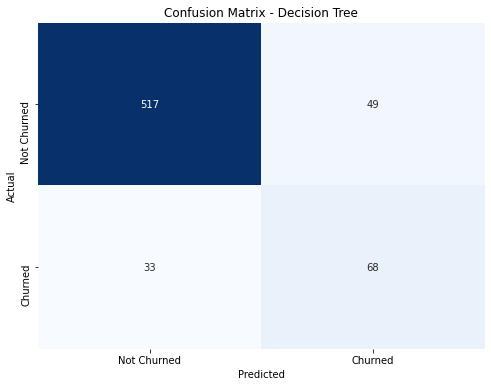

In [141]:
# Plot confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Top 10 Features and Their Importances for Decision Tree:
                   Feature  Importance
14  customer service calls    0.249338
2        total day minutes    0.195707
67    international plan_1    0.167401
5        total eve minutes    0.042084
13       total intl charge    0.039330
12        total intl calls    0.034139
68       voice mail plan_1    0.033439
7         total eve charge    0.026875
8      total night minutes    0.020693
9        total night calls    0.020246


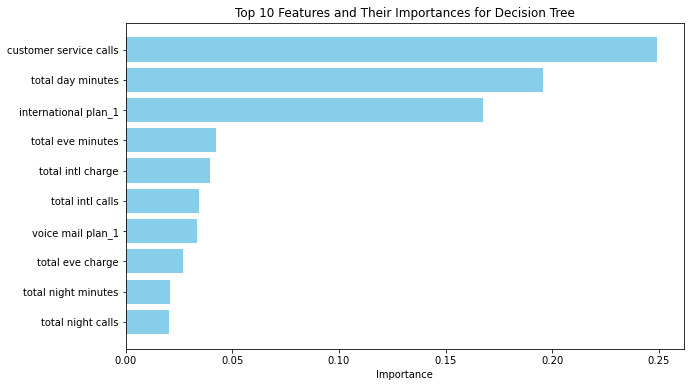

In [142]:
# Extract feature importances from the Decision Tree model
feature_importances_dt = decision_tree_model.feature_importances_

# Create a DataFrame to display feature names and their respective importances for Decision Tree
feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# Display the top 10 features and their importances for Decision Tree
top_10_features_dt = feature_importance_df_dt.head(10)
print("Top 10 Features and Their Importances for Decision Tree:")
print(top_10_features_dt)

# Plot the top 10 features and their importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_dt['Feature'], top_10_features_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features and Their Importances for Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()


The decision tree model has a recall score of 0.67, which is actually good but not better than our baseline model. This 
means that the model can identify around 67% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false
positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones 
and is not overfitting.

According to the model,customer service calls,total day minutes,international plan are the top three most important features.

# 4.3 Random Forest

In [143]:
# Create and train a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [144]:
# Predictions
y_pred_rf = random_forest_model.predict(X_test)


In [145]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9205397301349325


In [146]:
# Display the classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.74      0.73      0.74       101

    accuracy                           0.92       667
   macro avg       0.85      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



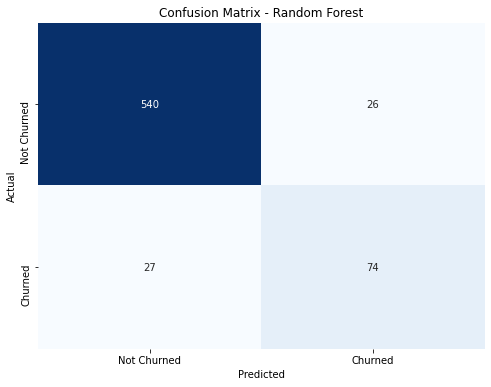

In [147]:
# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Top 10 Features and Their Importances for Random Forest:
                   Feature  Importance
14  customer service calls    0.166536
4         total day charge    0.095618
2        total day minutes    0.092391
67    international plan_1    0.088107
12        total intl calls    0.055909
7         total eve charge    0.043013
5        total eve minutes    0.042040
10      total night charge    0.037963
13       total intl charge    0.033559
11      total intl minutes    0.033081


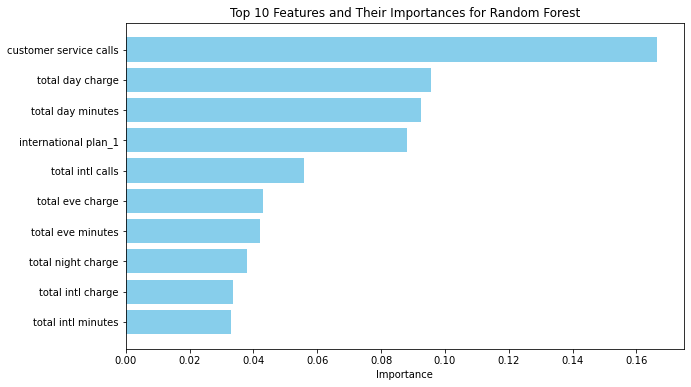

In [148]:
# Extract feature importances from the Random Forest model
feature_importances_rf = random_forest_model.feature_importances_

# Create a DataFrame to display feature names and their respective importances for Random Forest
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 10 features and their importances for Random Forest
top_10_features_rf = feature_importance_df_rf.head(10)
print("Top 10 Features and Their Importances for Random Forest:")
print(top_10_features_rf)

# Plot the top 10 features and their importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_rf['Feature'], top_10_features_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features and Their Importances for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

The random forest classifier model has a recall score of 0.73, which is great compared to the previous model. This means 
that the model can identify around 73% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false 
positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones 
and is not overfitting.

According to the model, customer service call,total day charge, total day minutes are the top three most important features.

# 4.4 XGBoost

In [149]:
# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [151]:
# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9565217391304348


In [152]:
# Display the classification report for XGBoost
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Classification Report for XGBoost:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       566
        True       0.90      0.80      0.85       101

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



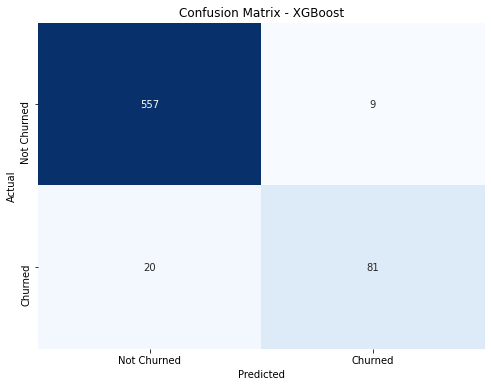

In [153]:


# Plot confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

Top 10 Features and Their Importances for XGBoost:
                   Feature  Importance
67    international plan_1    0.155765
14  customer service calls    0.087724
68       voice mail plan_1    0.072461
2        total day minutes    0.040531
45                state_NE    0.039567
13       total intl charge    0.037679
42                state_MT    0.034775
47                state_NJ    0.033006
51                state_OH    0.030935
37                state_ME    0.029679


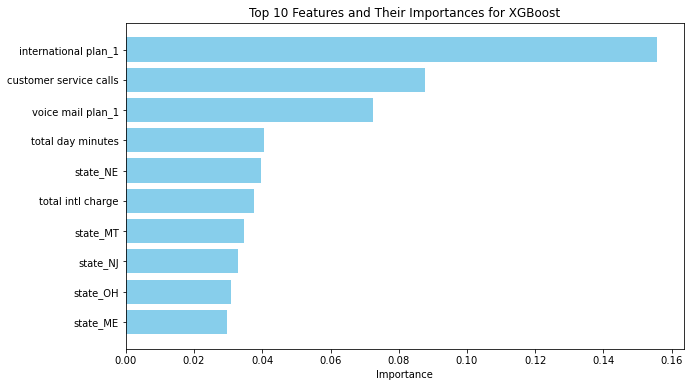

In [155]:
# Extract feature importances from the XGBoost model
feature_importances_xgb = xgb_model.feature_importances_

# Create a DataFrame to display feature names and their respective importances for XGBoost
feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Display the top 10 features and their importances for XGBoost
top_10_features_xgb = feature_importance_df_xgb.head(10)
print("Top 10 Features and Their Importances for XGBoost:")
print(top_10_features_xgb)

# Plot the top 10 features and their importances for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_xgb['Feature'], top_10_features_xgb['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features and Their Importances for XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

The XGBoost classifier model has a recall score of 0.80, which is actually better than all the previous models. This means 
that the model can identify around 80% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false
positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model international plan,customer service calls and voice mail plan are the top three most important features.

# 4.5. Modelling Evaluation

In [156]:
# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
roc_auc_lr = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

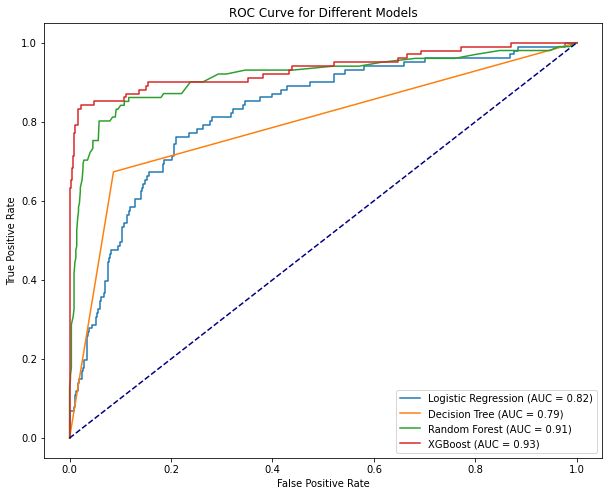

In [157]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

The ROC curve analysis shows that the XGBClassifier has the best performance, followed by the RandomForestClassifier, 
DecisionTreeClassifier, and LogisticRegression. The XGBClassifier has the highest AUC score of 0.93, while the
DecisionTree has the lowest AUC score of 0.79.

The ROC curve is a graphical plot that shows the trade-off between the true positive rate (TPR) and the false positive rate
(FPR) for a binary classifier. The TPR is the proportion of positive instances that are correctly classified, while the FPR
is the proportion of negative instances that are incorrectly classified. The AUC is the area under the ROC curve, and it is 
a measure of the overall performance of the classifier.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.

In [88]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [89]:
# Create and train an XGBoost classifier with grid search
xgb_model_tuned = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [90]:
# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)


Best Parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [91]:
# Train XGBoost model with the best parameters
xgb_model_best = xgb.XGBClassifier(**best_params, random_state=42)
xgb_model_best.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
# Predictions
y_pred_xgb_best = xgb_model_best.predict(X_test)

In [93]:
# Evaluate the XGBoost model with best parameters
xgb_best_accuracy = accuracy_score(y_test, y_pred_xgb_best)
print("XGBoost with Best Parameters Accuracy:", xgb_best_accuracy)


XGBoost with Best Parameters Accuracy: 0.9565217391304348


In [94]:
# Display the classification report for XGBoost with best parameters
print("Classification Report for XGBoost with Best Parameters:")
print(classification_report(y_test, y_pred_xgb_best))

Classification Report for XGBoost with Best Parameters:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       566
        True       0.89      0.81      0.85       101

    accuracy                           0.96       667
   macro avg       0.93      0.90      0.91       667
weighted avg       0.96      0.96      0.96       667



In [95]:
# Extract feature importances from the XGBoost model with best parameters
feature_importances_xgb_best = xgb_model_best.feature_importances_

# Create a DataFrame to display feature names and their respective importances for XGBoost with best parameters
feature_importance_df_xgb_best = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb_best})
feature_importance_df_xgb_best = feature_importance_df_xgb_best.sort_values(by='Importance', ascending=False)

# Display the top 10 features and their importances for XGBoost with best parameters
top_10_features_xgb_best = feature_importance_df_xgb_best.head(10)
print("Top 10 Features and Their Importances for XGBoost with Best Parameters:")
print(top_10_features_xgb_best)

Top 10 Features and Their Importances for XGBoost with Best Parameters:
                   Feature  Importance
67    international plan_1    0.120177
68       voice mail plan_1    0.083229
14  customer service calls    0.080409
13       total intl charge    0.077970
2        total day minutes    0.048804
4         total day charge    0.031169
10      total night charge    0.025488
35                state_MA    0.024970
47                state_NJ    0.024582
12        total intl calls    0.023835


The tuned XGBoost classifier model has a recall score of 0.81, meaning This means that the model can identify around 77% of
the actual positive instances correctly.


According to this model,international plan,voice mail plan and customer service calls are the top three most important 
features.

# Summary

Following the modelling and analysis that we have done above we can come up with the following recommendations:

1.Offer discounts or promotional offers to customers in area code 415 and 510, as these areas have a higher churn rate. This
can help incentivize customers to stay with the company.

2.Offering attractive international plans might help in retaining customers.

3.Improve customer service quality and reduce the number of customer service calls. Enhance training programs for customer 
service representatives to ensure prompt and effective resolution of customer issues, leading to higher customer satisfaction and reduced churn.

4.Focus on customer retention strategies in states with higher churn rates, such as Texas, New Jersey, Maryland, Miami, and New York. This can involve targeted marketing campaigns, personalized offers, or improved customer support tailored to the specific needs and preferences of customers in those states.

5.Enhance the value proposition of the voicemail plan to increase adoption among customers. Highlight the benefits and 
convenience of voicemail services, and consider offering additional features or discounts to encourage customers to sign up.

6.Monitoring and managing total day charge and minutes is crucial to address customer concerns and potential churn.